testing out rosenbrock function optimization with
gradient descent

inspiration:
https://www.indusmic.com/post/rosenbrock-function 

In [167]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [168]:
# 2 dim rosenbrock function and its partial derivatives
b = 10

f = lambda w1, w2: b * (w2 - w1**2)**2 + (w1 - 1)**2
f_w1 = lambda w1, w2: -4 * b * w1 * (w2 - w1**2) + 2 * (w1 - 1)
f_w2 = lambda w1, w2: 2 * b * (w2 - w1**2) 

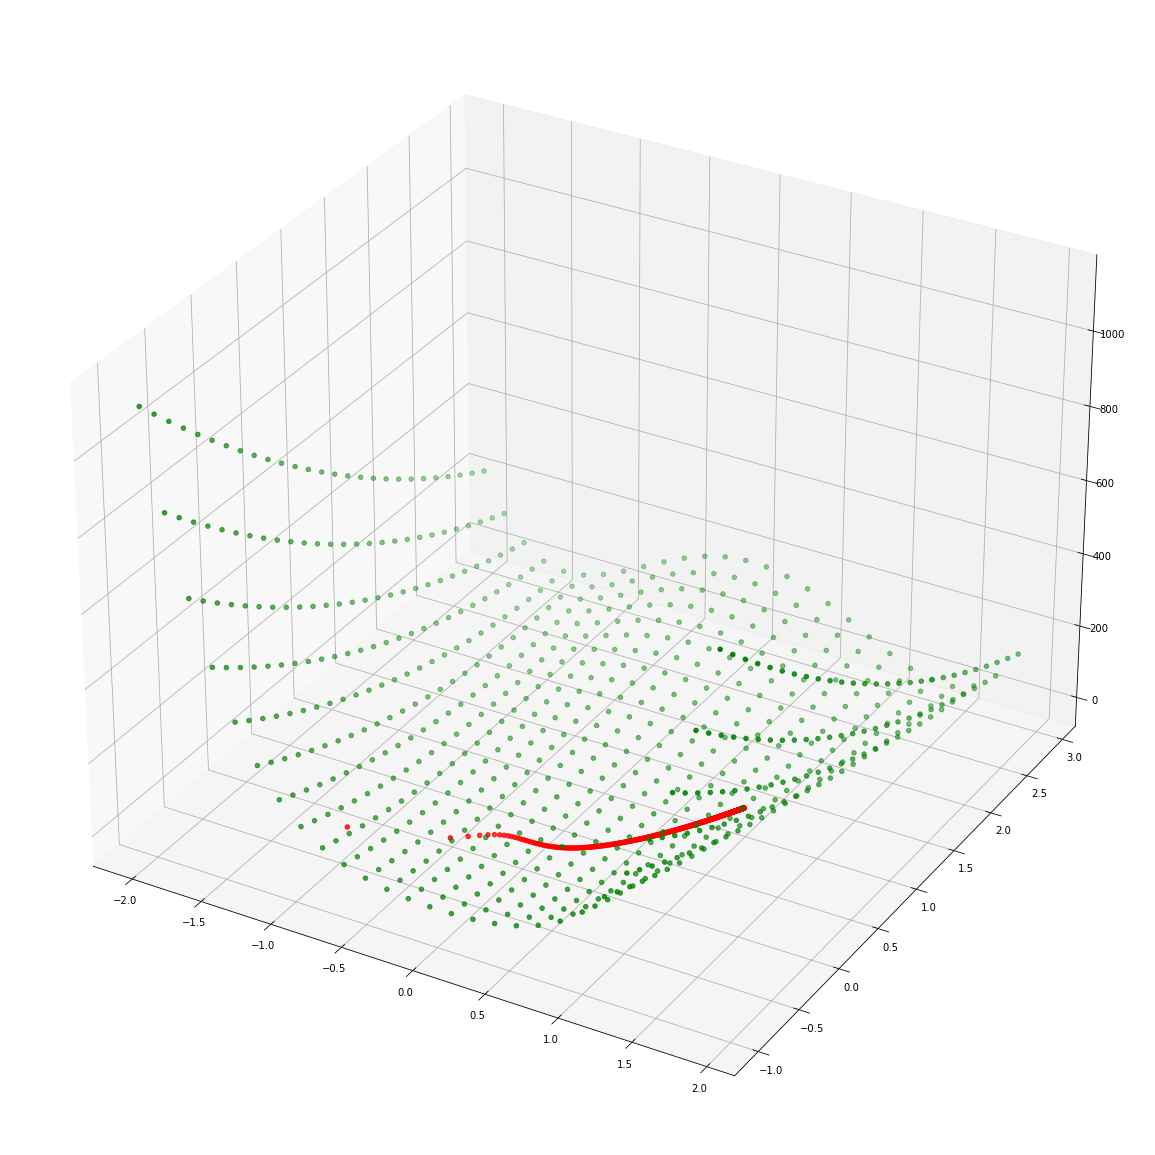

In [278]:
# hypterparameter
eta = .01  # learning rate
iterations = 1000

sc = 1.5  # scale of plot
plot_function = 1  # plot surface of function

# initial values
w1, w2 = np.random.uniform(-1, 1, 2)

# the history of minimizing (for plotting)
hw1, hw2, hf = [w1], [w2], [f(w1, w2)]

#  gradient descent
for i in range(iterations):
    w1b = w1
    w1 -= eta * f_w1(w1, w2)
    w2 -= eta * f_w2(w1b, w2) 
    
    hw1.append(w1)
    hw2.append(w2)
    hf.append(f(w1, w2))
    
# Initialize figure 
fig = plt.figure(figsize=(36, 21))
ax = plt.axes(projection='3d')

# Evaluate function
X1 = np.arange(sc*-2, sc*2, sc*0.15)
X2 = np.arange(sc*-1, sc*3, sc*0.15)
X1, X2 = np.meshgrid(X1, X2)
    
Z = f(X1, X2)

# Plot the surface
if plot_function:
    # ax.plot_surface(X, Y, Z, cmap=cm.gist_heat_r, linewidth=0, antialiased=True)
    ax.scatter(X, Y, Z, c='g')
    
points = [hw1, hw2, hf] 
ax.scatter(*points, c='r') 

plt.show() 

In [279]:
# create a 'movie' of the graph
ax.elev = 10
for i in range(0, 360):
    ax.azim = i
    fig.savefig("./optimize_rosenbrock/%d.png" % i)

In [280]:
# make images to movie
!ffmpeg -r 60 -f image2 -s 1920x1080 -i ./optimize_rosenbrock/%d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p out.mp4

ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable